In [29]:
#importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

In [30]:
#Merging 12 months of sales data into a single file
#Create a list of all files in current directory
all_files = os.listdir('C:\sales_data')
# Create an empty list to assign csv files
csv_files = []

# Create a lis of only the csv files in current directory
for file in all_files:
    if file[-3:] == 'csv':
        csv_files.append(file)
    else: 
        pass

csv_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [31]:
all_data = pd.concat((pd.read_csv("C:/sales_data/"+f) for f in csv_files))

In [32]:
#cleaning data
all_data =all_data.dropna(how="all")
all_data = all_data[all_data['Order Date'].str[0:2]!="Or"]

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [33]:
#adding month column
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months']  = all_data['Months'].astype(int)
# all_data.head()

In [34]:
#add a sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# all_data.head()

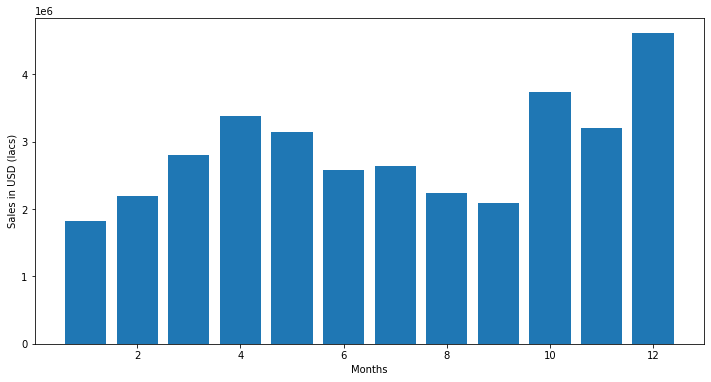

In [35]:
#what was the best month for sales
q1=all_data.groupby('Months').sum()
plt.figure(figsize=(12,6))
months= range(1,13)
plt.bar(months,q1['Sales'])
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Months')
plt.show()

In [36]:
#what city sold the most product
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


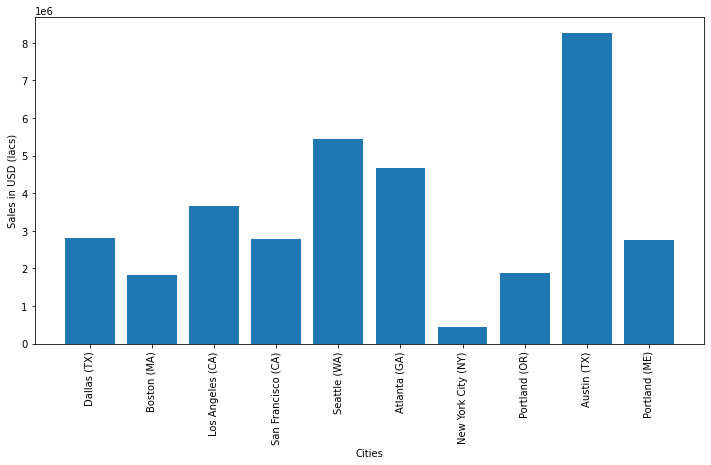

In [37]:
q2=all_data.groupby('City').sum()
plt.figure(figsize=(12,6))
cities = all_data['City'].unique()
plt.bar(cities,q2['Sales'])
plt.xticks(rotation= 90)
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Cities')
plt.show()

In [38]:
#what time should we display advertisements to maximize the likelihood of customers buying product?
#add a column- hour
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()
#this step is a bit time consuming(26s)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


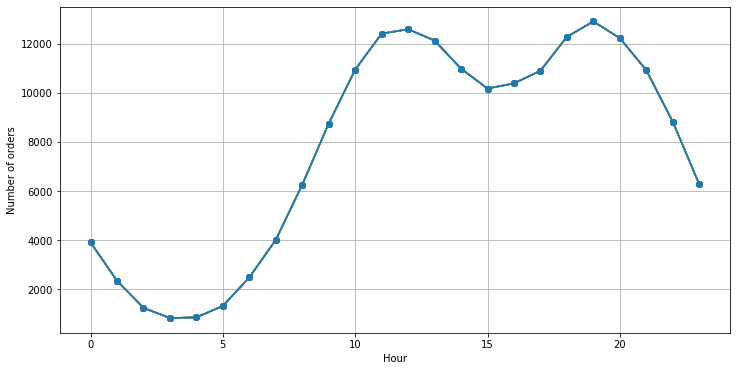

In [39]:
#all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(12,6))
plt.plot(hours,all_data.groupby('Hour').count(),marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

In [40]:
#what products are most oftern sold together
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [41]:
#Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

<ipython-input-41-b020274c1dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [42]:
#https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [43]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


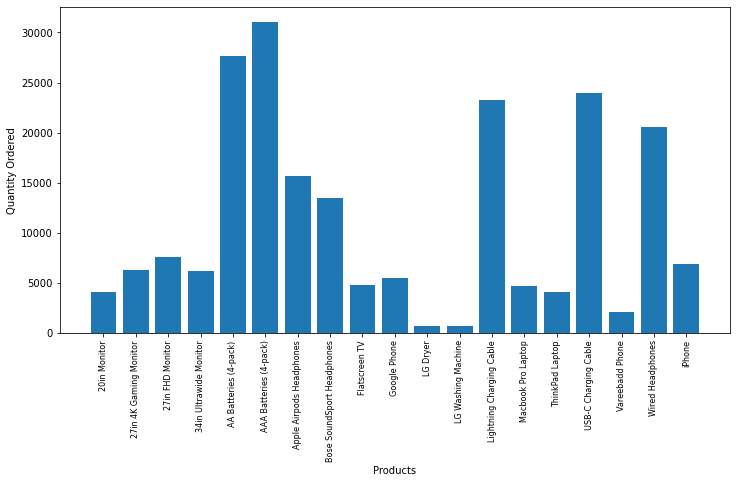

In [44]:
#What product sold the most? Why do you think it sold the most?
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
# product_group.sum()
products = [product for product, df in product_group]
plt.figure(figsize=(12,6))
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size='8')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

<ipython-input-45-c019a01df8ab>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
<ipython-input-45-c019a01df8ab>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


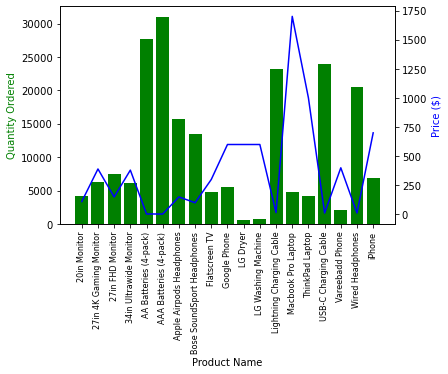

In [45]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
fig.show()

In [46]:
city_sales=df.groupby('City')['Sales'].sum().nlargest(5)
city_sales

City
San Francisco (CA)    896779.93
Los Angeles (CA)      557713.16
New York City (NY)    510436.35
Boston (MA)           394961.30
Atlanta (GA)          319432.46
Name: Sales, dtype: float64

In [47]:
city_sales=df.groupby('City')['Sales'].sum().nlargest(5)
city_sales

City
San Francisco (CA)    896779.93
Los Angeles (CA)      557713.16
New York City (NY)    510436.35
Boston (MA)           394961.30
Atlanta (GA)          319432.46
Name: Sales, dtype: float64

In [48]:
city_sales = df.groupby(['City']).sum()
city_sales

,Quantity Ordered,Price Each,Months,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),1297,318957.41,8507,319432.46,17501,37058,1230
Austin (TX),830,181571.57,5452,182136.48,10804,21813,772
Boston (MA),1803,393052.53,11496,394961.30,24549,49811,1645
Dallas (TX),1234,283835.71,7870,284598.19,16071,34163,1132
Los Angeles (CA),2331,555033.47,15197,557713.16,31546,62080,2158
New York City (NY),2190,507745.20,14020,510436.35,29239,58318,2015
Portland (ME),191,41822.90,1147,41917.36,2631,5372,179
Portland (OR),834,200650.22,5426,201192.01,10698,23622,768
San Francisco (CA),3818,891986.46,25092,896779.93,51334,105801,3562


In [49]:
ans_df3 = new_df.groupby(['Product']).sum()
ans_df3 = ans_df3.sort_values(by='Quantity Ordered')

In [50]:
filt = all_data['Quantity Ordered'] == 'Quantity Ordered'
new_df = all_data.loc[-filt]

In [51]:
new_df.shape

(185950, 12)

In [52]:
ans_df3 = new_df.groupby(['Product']).sum()
ans_df3 = ans_df3.sort_values(by='Quantity Ordered')

In [53]:
ans_df3

,Quantity Ordered,Price Each,Months,Sales,Hour,Minute,Count
Product,,,,,,,
LG Dryer,646,387600.00,4383,387600.00,9326,19043,646
LG Washing Machine,666,399600.00,4523,399600.00,9785,19462,666
Vareebadd Phone,2068,826000.00,14309,827200.00,29472,61835,2065
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
ThinkPad Laptop,4130,4127958.72,28950,4129958.70,59746,121508,4128
Macbook Pro Laptop,4728,8030800.00,33548,8037600.00,68261,137574,4724
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800
Google Phone,5532,3315000.00,38305,3319200.00,79479,162773,5525
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181


In [54]:
city_grp = new_df.groupby(['City'])

In [55]:
ans_df2 = city_grp['Sales'].sum()
ans_df2.rename('Units')

City
Atlanta (GA)          2.795499e+06
Austin (TX)           1.819582e+06
Boston (MA)           3.661642e+06
Dallas (TX)           2.767975e+06
Los Angeles (CA)      5.452571e+06
New York City (NY)    4.664317e+06
Portland (ME)         4.497583e+05
Portland (OR)         1.870732e+06
San Francisco (CA)    8.262204e+06
Seattle (WA)          2.747755e+06
Name: Units, dtype: float64

In [57]:
data_q3 = all_data[['City','Sales']]
data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

City
San Francisco (CA)    8.262204e+06
Los Angeles (CA)      5.452571e+06
New York City (NY)    4.664317e+06
Boston (MA)           3.661642e+06
Atlanta (GA)          2.795499e+06
Dallas (TX)           2.767975e+06
Seattle (WA)          2.747755e+06
Portland (OR)         1.870732e+06
Austin (TX)           1.819582e+06
Portland (ME)         4.497583e+05
Name: Sales, dtype: float64

In [58]:
plot_q3 = data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

plt_1 = sns.barplot(x=plot_q3.index, y=plot_q3)

for item in plt_1.get_xticklabels():
    item.set_rotation(90)

NameError: name 'sns' is not defined

In [59]:
import seaborn as sns

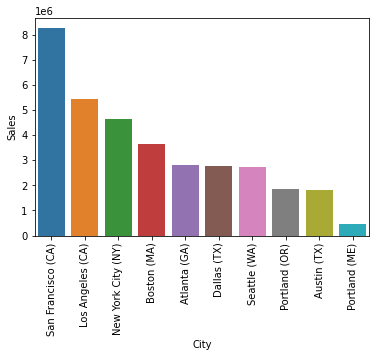

In [60]:
#Which city sold the most product?
plot_q3 = data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

plt_1 = sns.barplot(x=plot_q3.index, y=plot_q3)

for item in plt_1.get_xticklabels():
    item.set_rotation(90)